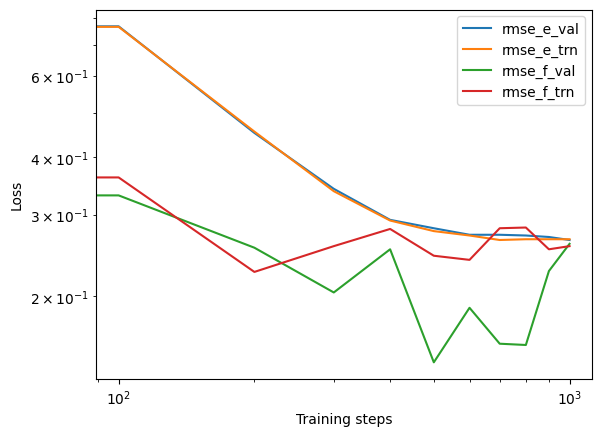

In [12]:
import numpy as np  # 导入NumPy库，用于数值计算
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于画图
import pandas as pd  # 导入Pandas库，用于处理表格数据

# 打开 lcurve.out 文件，读取第一行（表头）
with open("/public/home/huangyiru/My-Work/CACFM/aml-intro-main 2/learningnotes3/result/lcurve.out") as f:
    headers = f.readline().split()[1:]  # 读取第一行并用空格分割，去掉第一个无用字段（通常是#）

# 用Pandas读取整个 lcurve.out 文件的数据（不包含表头）
lcurve = pd.DataFrame(
    np.loadtxt("/public/home/huangyiru/My-Work/CACFM/aml-intro-main 2/learningnotes3/result/lcurve.out"),  # 用NumPy读取数值
    columns=headers  # 设置列名为刚才读取的表头
)

# 定义需要画的曲线的名字（验证集能量误差、训练集能量误差、验证集力误差、训练集力误差）
legends = ["rmse_e_val", "rmse_e_trn", "rmse_f_val", "rmse_f_trn"]

# 循环画出每一条曲线
for legend in legends:
    plt.loglog(lcurve["step"], lcurve[legend], label=legend)  # 用log-log坐标画出step vs. 对应误差

plt.legend()  # 显示图例
plt.xlabel("Training steps")  # 设置x轴标签
plt.ylabel("Loss")  # 设置y轴标签
plt.show()  # 显示图形


In [13]:
!/public/software/mambaforge/envs/deepmd/bin/dp freeze -o graph.pb

2025-05-06 19:26:15.385413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-06 19:26:15.396292: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-06 19:26:15.399505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-06 19:26:15.408928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-06 19:26:16.125242: W tensorflow/compiler/tf2

In [14]:
import dpdata

training_systems = dpdata.LabeledSystem("/public/home/huangyiru/My-Work/CACFM/aml-intro-main 2/learningnotes3/DeePMD-kit_Tutorial/00.data/training_data",  fmt = "deepmd/npy")  
predict = training_systems.predict("graph.pb")  

I0000 00:00:1746530780.072756 1720023 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746530780.072991 1720023 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746530780.073154 1720023 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1746530780.073308 1720023 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[]

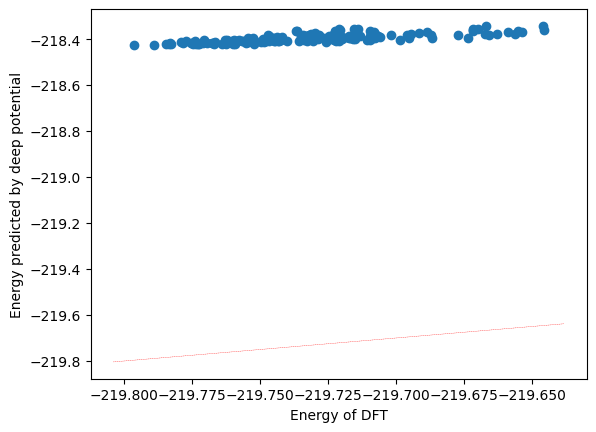

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(training_systems["energies"], predict["energies"])

x_range = np.linspace(plt.xlim()[0], plt.xlim()[1])

plt.plot(x_range, x_range, "r--", linewidth = 0.25)
plt.xlabel("Energy of DFT")
plt.ylabel("Energy predicted by deep potential")
plt.plot()